#### Vector Autoregressions tsa.vector_ar

Reference: https://www.statsmodels.org/dev/vector_ar.html

In [2]:
# some example data
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str

In [19]:
mdata = pd.read_pickle('./dados/dados_economicos_industria.pkl')


In [20]:
data = np.log(mdata).diff().dropna()

# make a VAR model
model = VAR(data)

c:\Users\Rodrigo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [21]:
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 16, Jun, 2023
Time:                     01:45:17
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -27.4024
Nobs:                     249.000    HQIC:                  -27.8666
Log likelihood:           1796.75    FPE:                5.78065e-13
AIC:                     -28.1794    Det(Omega_mle):     4.65700e-13
--------------------------------------------------------------------
Results for equation energia_industrial
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.001340         0.001747            0.767           0.443
L1.energia_industrial        -0.091798         0.067354           -1.363           0.173
L1.indic_comm_e

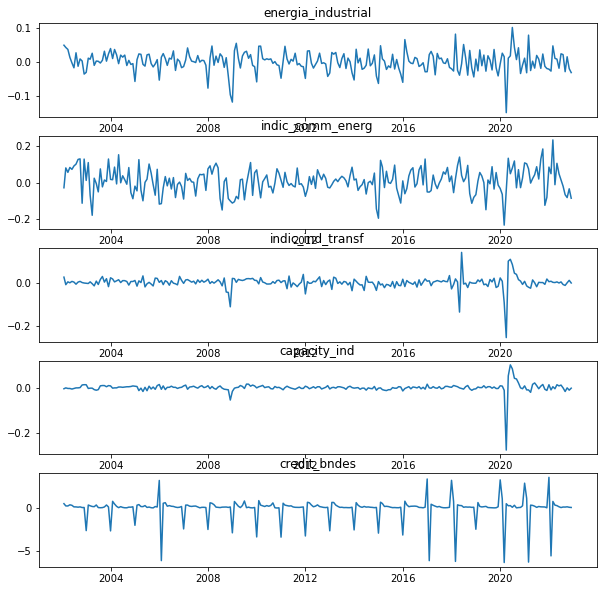

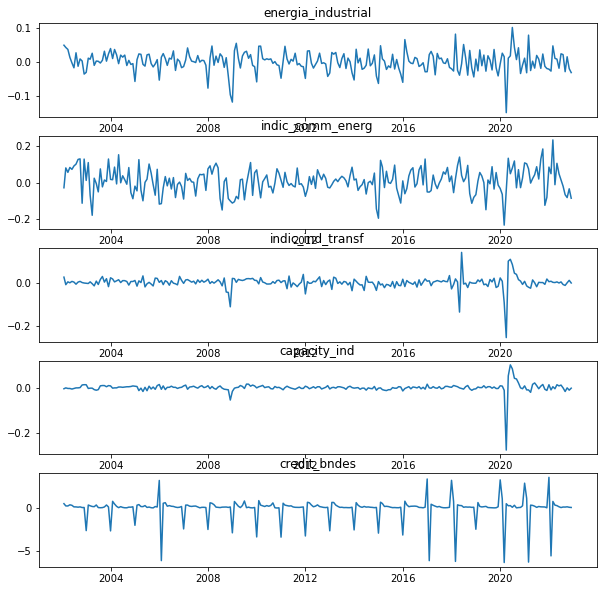

In [22]:
results.plot()

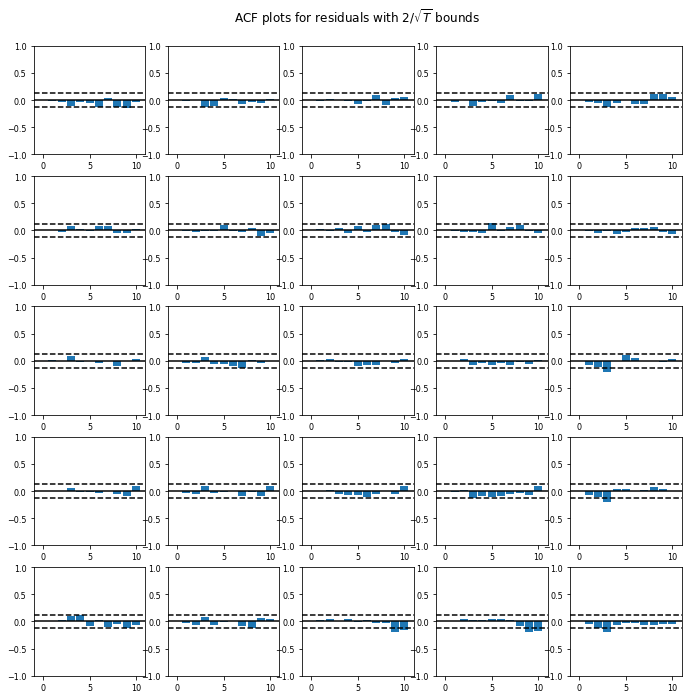

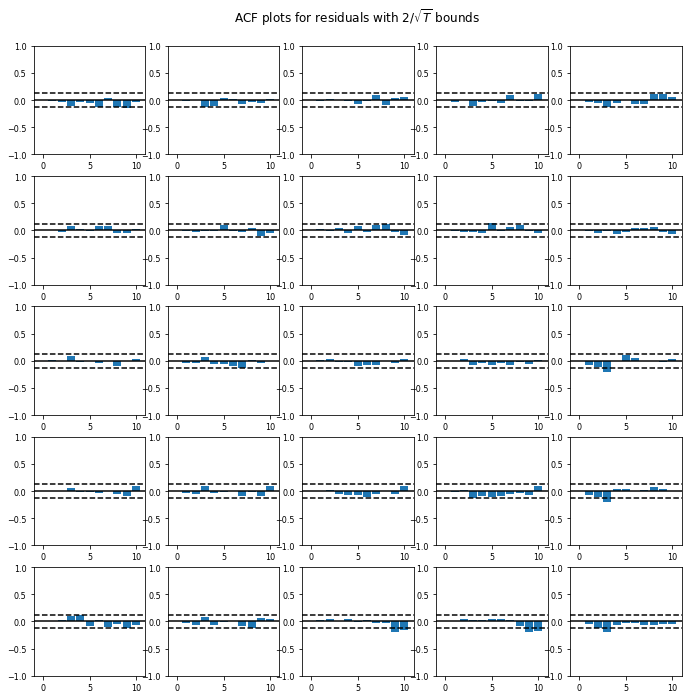

In [23]:
results.plot_acorr()

#### Lag order selection

In [24]:
model.select_order(15)

#### Forecasting

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>y</mi>
    <mi>t</mi>
  </msub>
  <mo stretchy="false">(</mo>
  <mi>h</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>&#x3BD;</mi>
  <mo>+</mo>
  <msub>
    <mi>A</mi>
    <mn>1</mn>
  </msub>
  <msub>
    <mi>y</mi>
    <mi>t</mi>
  </msub>
  <mo stretchy="false">(</mo>
  <mi>h</mi>
  <mo>&#x2212;</mo>
  <mn>1</mn>
  <mo stretchy="false">)</mo>
  <mo>+</mo>
  <mo>&#x22EF;</mo>
  <mo>+</mo>
  <msub>
    <mi>A</mi>
    <mi>p</mi>
  </msub>
  <msub>
    <mi>y</mi>
    <mi>t</mi>
  </msub>
  <mo stretchy="false">(</mo>
  <mi>h</mi>
  <mo>&#x2212;</mo>
  <mi>p</mi>
  <mo stretchy="false">)</mo>
</math>

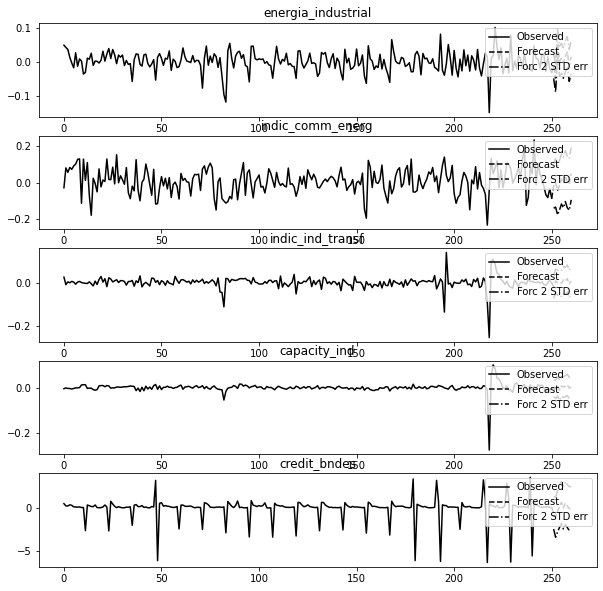

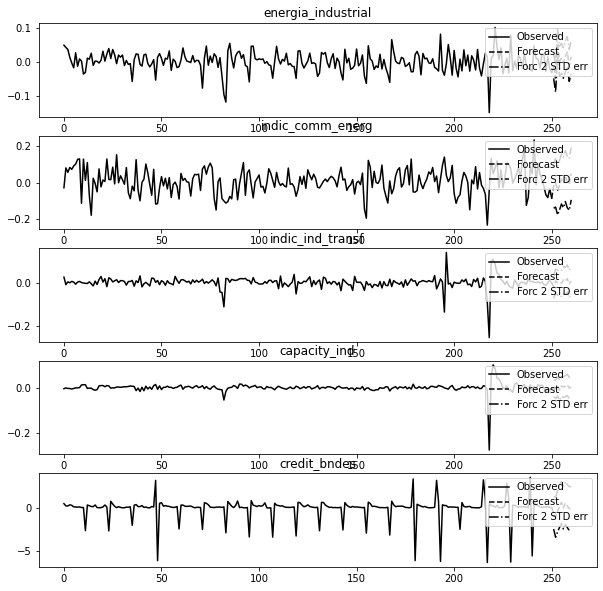

In [25]:
results = model.fit(maxlags=15, ic='aic')
lag_order = results.k_ar
results.plot_forecast(10)

#### Impulse Response Analysis¶
Impulse responses are of interest in econometric studies: they are the estimated responses to a unit impulse in one of the variables. They are computed in practice using the MA(
) representation of the VAR(p) process:

$Y_t = \mu + \sum_{i=0}^\infty \Phi_i u_{t-i}$


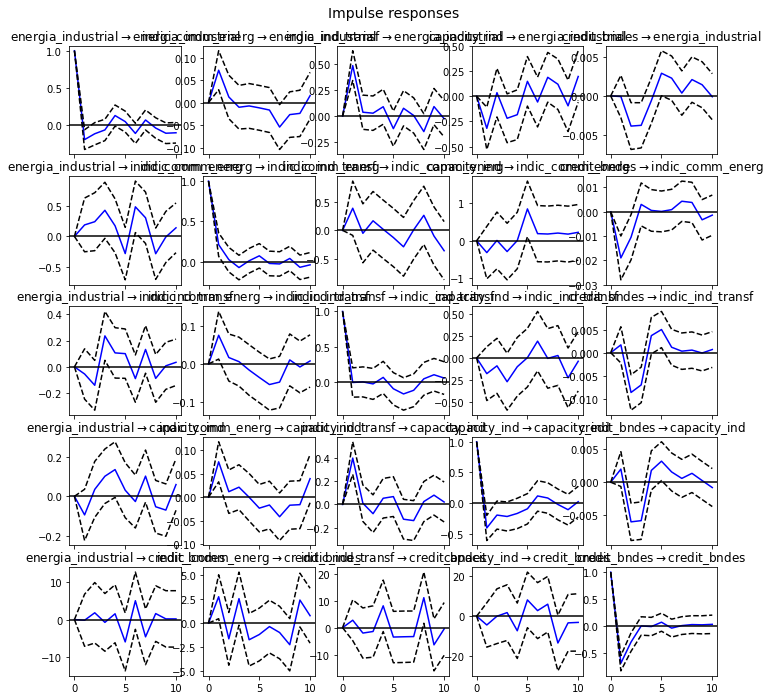

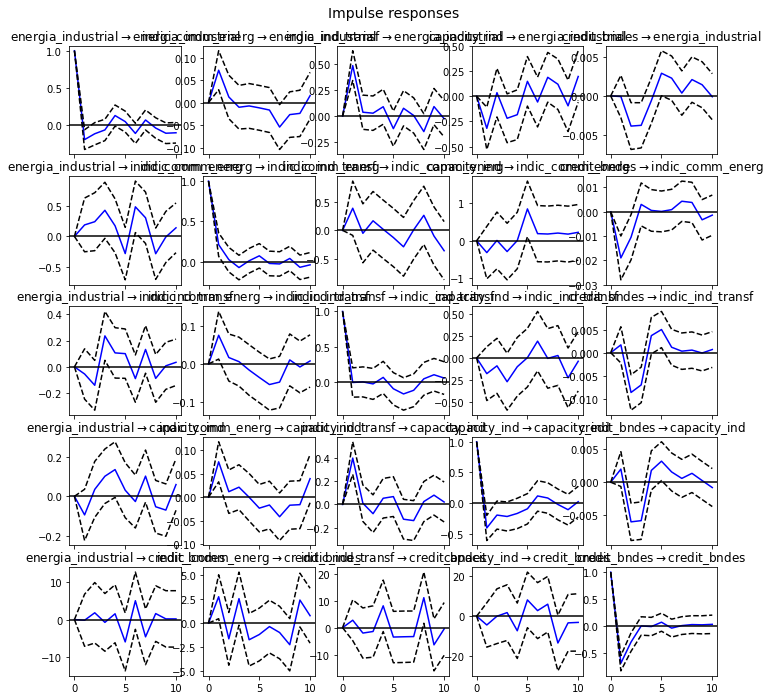

In [26]:
irf = results.irf(10)
irf.plot(orth=False)

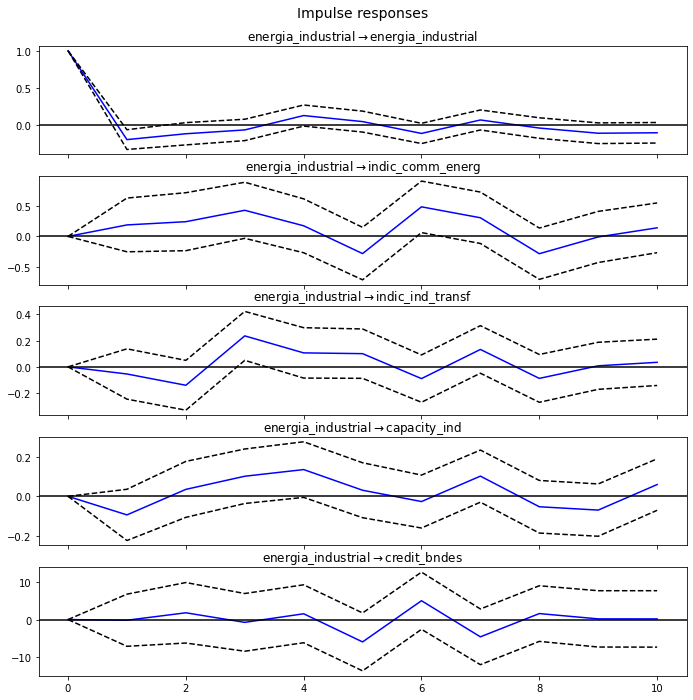

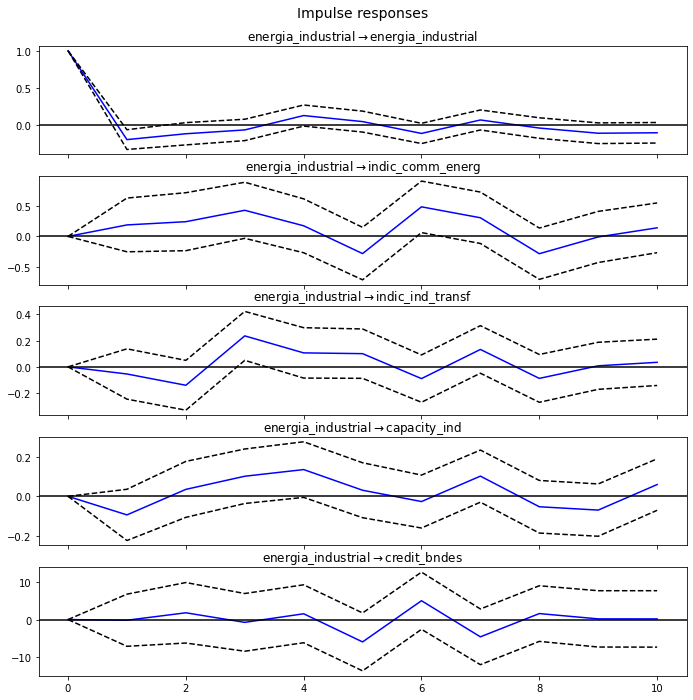

In [35]:
irf.plot(impulse='energia_industrial')

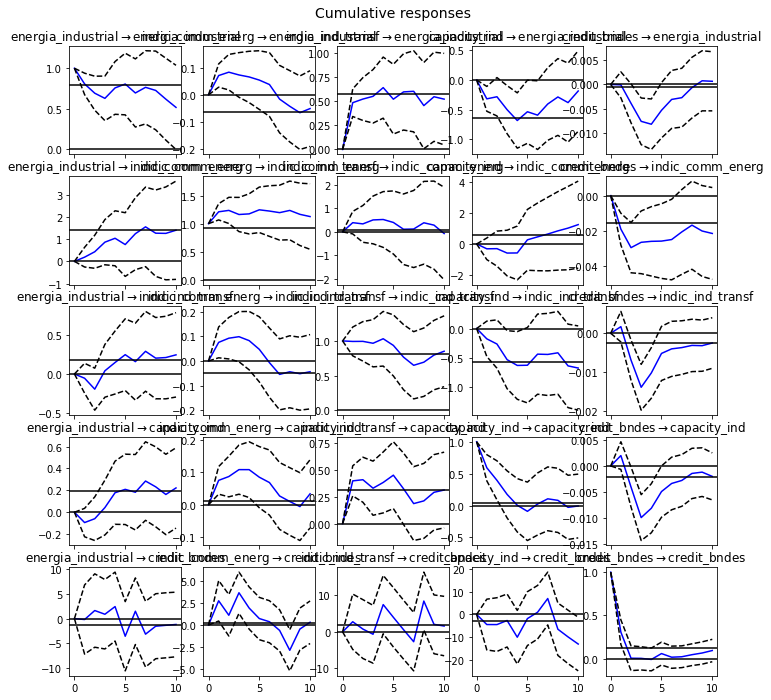

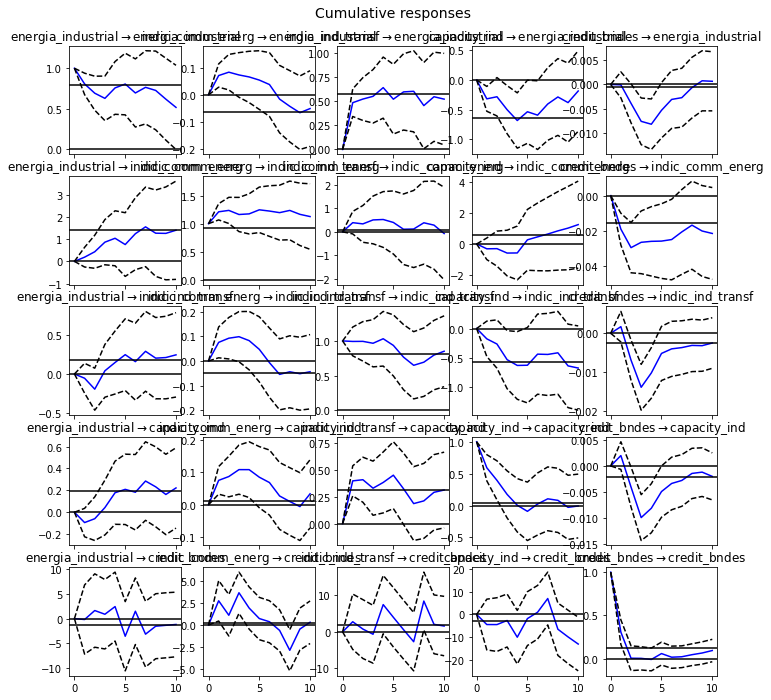

In [37]:
irf.plot_cum_effects(orth=False)

#### Forecast Error Variance Decomposition (FEVD)¶
Forecast errors of component j on k in an i-step ahead forecast can be decomposed using the orthogonalized impulse responses 

$\begin{align}\begin{aligned}\omega_{jk, i} = \sum_{i=0}^{h-1} (e_j^\prime \Theta_i e_k)^2 / \mathrm{MSE}_j(h)\\\mathrm{MSE}_j(h) = \sum_{i=0}^{h-1} e_j^\prime \Phi_i \Sigma_u \Phi_i^\prime e_j\end{aligned}\end{align}$

In [30]:
fevd = results.fevd(5)
fevd.summary()

FEVD for energia_industrial
     energia_industrial  indic_comm_energ  indic_ind_transf  capacity_ind  credit_bndes
0              1.000000          0.000000          0.000000      0.000000      0.000000
1              0.759343          0.050791          0.152939      0.036914      0.000013
2              0.731801          0.050836          0.151535      0.036072      0.029756
3              0.701649          0.049144          0.145936      0.048658      0.054614
4              0.695605          0.048733          0.143177      0.058322      0.054163

FEVD for indic_comm_energ
     energia_industrial  indic_comm_energ  indic_ind_transf  capacity_ind  credit_bndes
0              0.019576          0.980424          0.000000      0.000000      0.000000
1              0.031670          0.877361          0.011843      0.002843      0.076282
2              0.034939          0.853855          0.011560      0.002799      0.096847
3              0.045155          0.840911          0.011498      

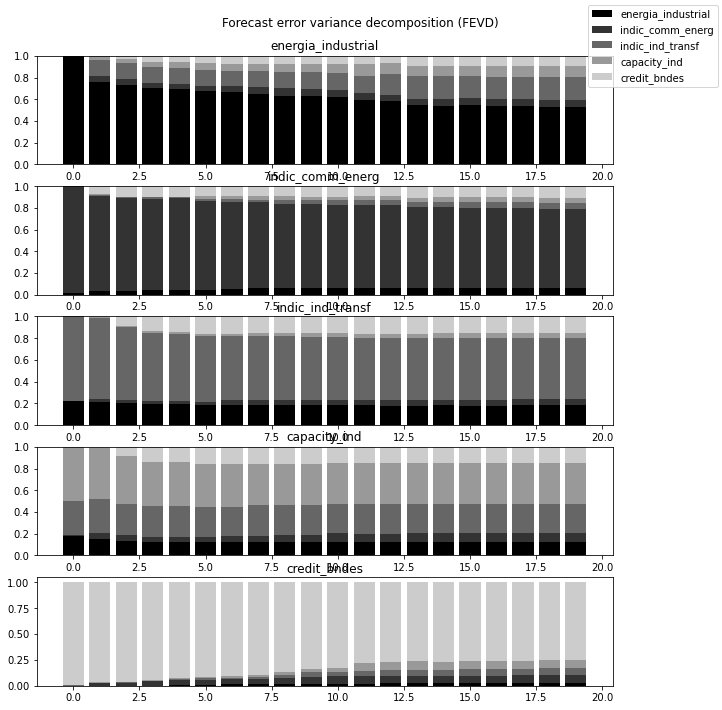

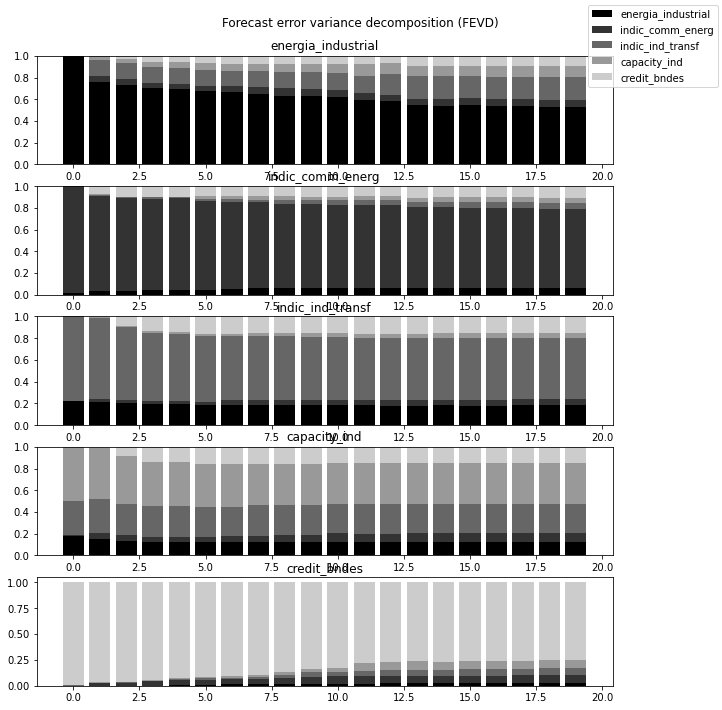

In [31]:
results.fevd(20).plot()

#### Granger causality

In [33]:
#energia_industrial  indic_comm_energ  indic_ind_transf  capacity_ind  credit_bndes
test_gr = results.test_causality('credit_bndes', ['indic_ind_transf', 'capacity_ind'], kind='f')
test_gr.summary()

Test statistic,Critical value,p-value,df
1.592,1.530,0.036,"(24, 890)"


#### Normality

In [34]:
test_n = results.test_normality()
test_n.summary()

Test statistic,Critical value,p-value,df
3568.,18.31,0.000,10
